# Statistical Analysis, EDA, A/B test. TikTok Data
---
Notebook Summary Report

The TikTok data team seeks to develop a machine learning model to assist in the classification of claims for user submissions. In this part of the project, the data team will conduct a hypothesis test to analyze the relationship between variables.

**The purpose** Prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for tikitiki.

**The goal** is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. 

**Part 1:** Imports and data loading

**Part 2:** Conduct EDA and hypothesis testing

**Part 3:** Communicate insights with stakeholders

- Apply descriptive and inferential statistics, probability distributions, confidence intervals, and hypothesis testing in Python

- Key business insight(s) emerged from your A/B test?

- Business recommendations 


#### Descriptive statistics and A/B test

**Part 1:** Exploratory data analysis

* Computing descriptive statistics

**Part 2:** Hypothesis testing with Python

* Conducting a two-sample hypothesis test

Do in average, veryfied user share more videos than unveryfied users? 

$H_0$ : Both groups share equally

$H_a$ : Verified users share more than un-verified users.

But Before we need to check for assuptions of normallity.

In [2]:
## This are the packages that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import exploratory_data_analysis.eda_functions as eda ## house EDA functions, and a work in progress.
## For encoding
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import scipy

import datetime as dt

import warnings as cuidado
cuidado.filterwarnings('ignore')

In [28]:
## Define dataframe and populate.
path = '/home/scicat/Downloads/coursera/TikTok/pythonDS/tiktok_dataset.csv'
df = pd.read_csv(path)
df.dropna(inplace=True)


## Creating a likes_per_view column
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']
# Creating a comments_per_view column
df['comments_per_view'] = df['video_comment_count'] / df['video_view_count']
# Creating a shares_per_view column
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']


df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


#### Observing distributions

In [29]:
continious =[
    'video_duration_sec',
    'video_view_count',
    'video_like_count',
    'video_share_count',
    'video_download_count',
    'video_comment_count',
    'likes_per_view',
    'comments_per_view',
]
nominal =[
    'author_ban_status',
    
]
binary =[
    'claim_status', 
    'verified_status',
]

txt = [
    'video_transcription_text',
]

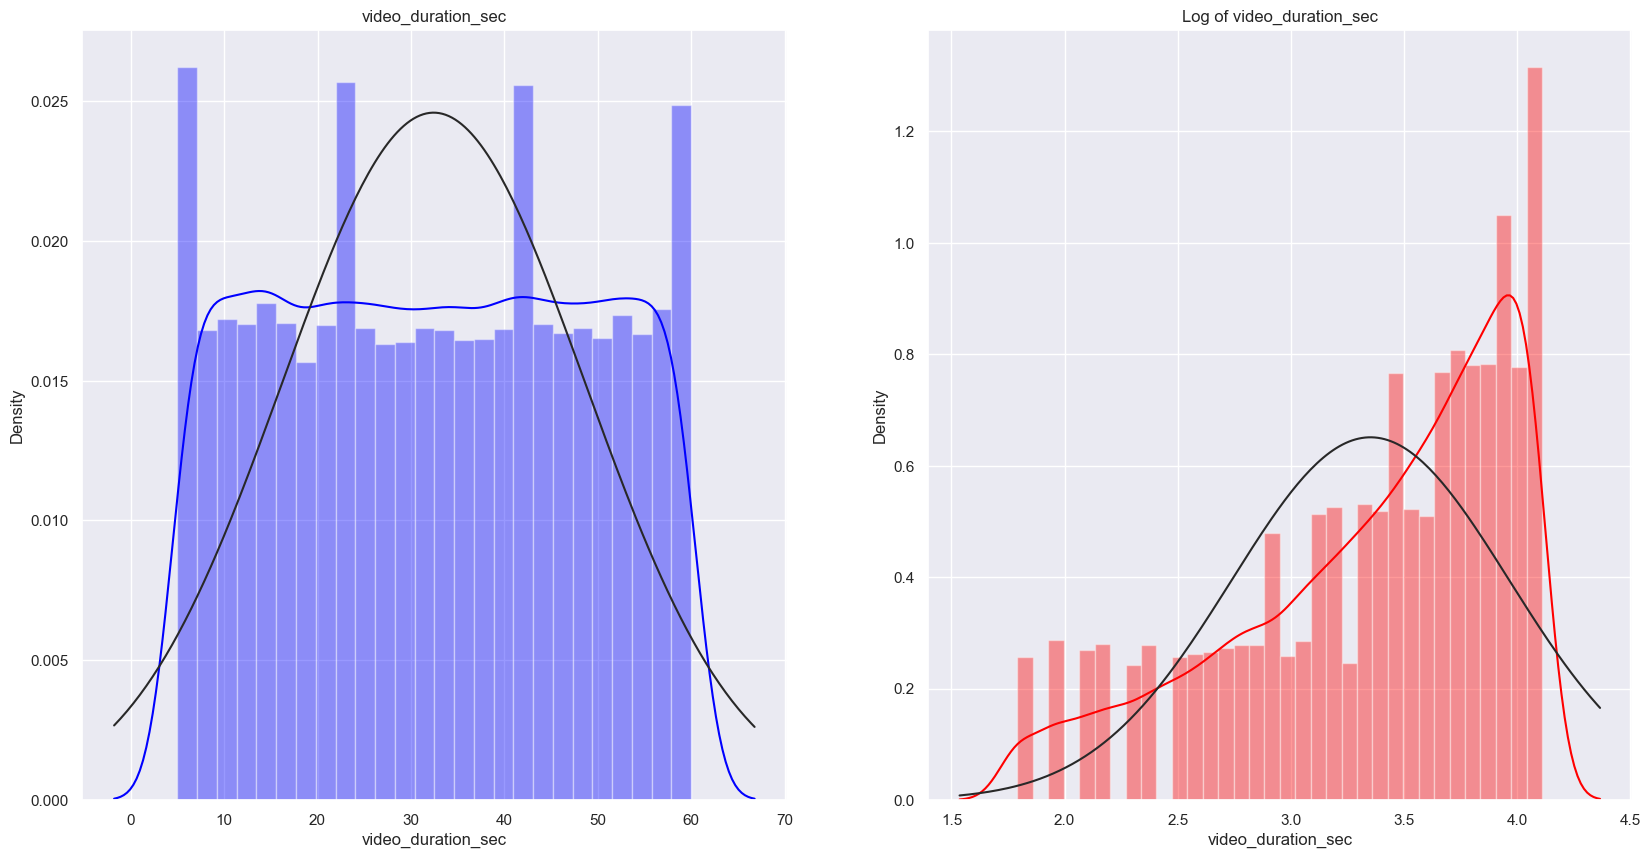

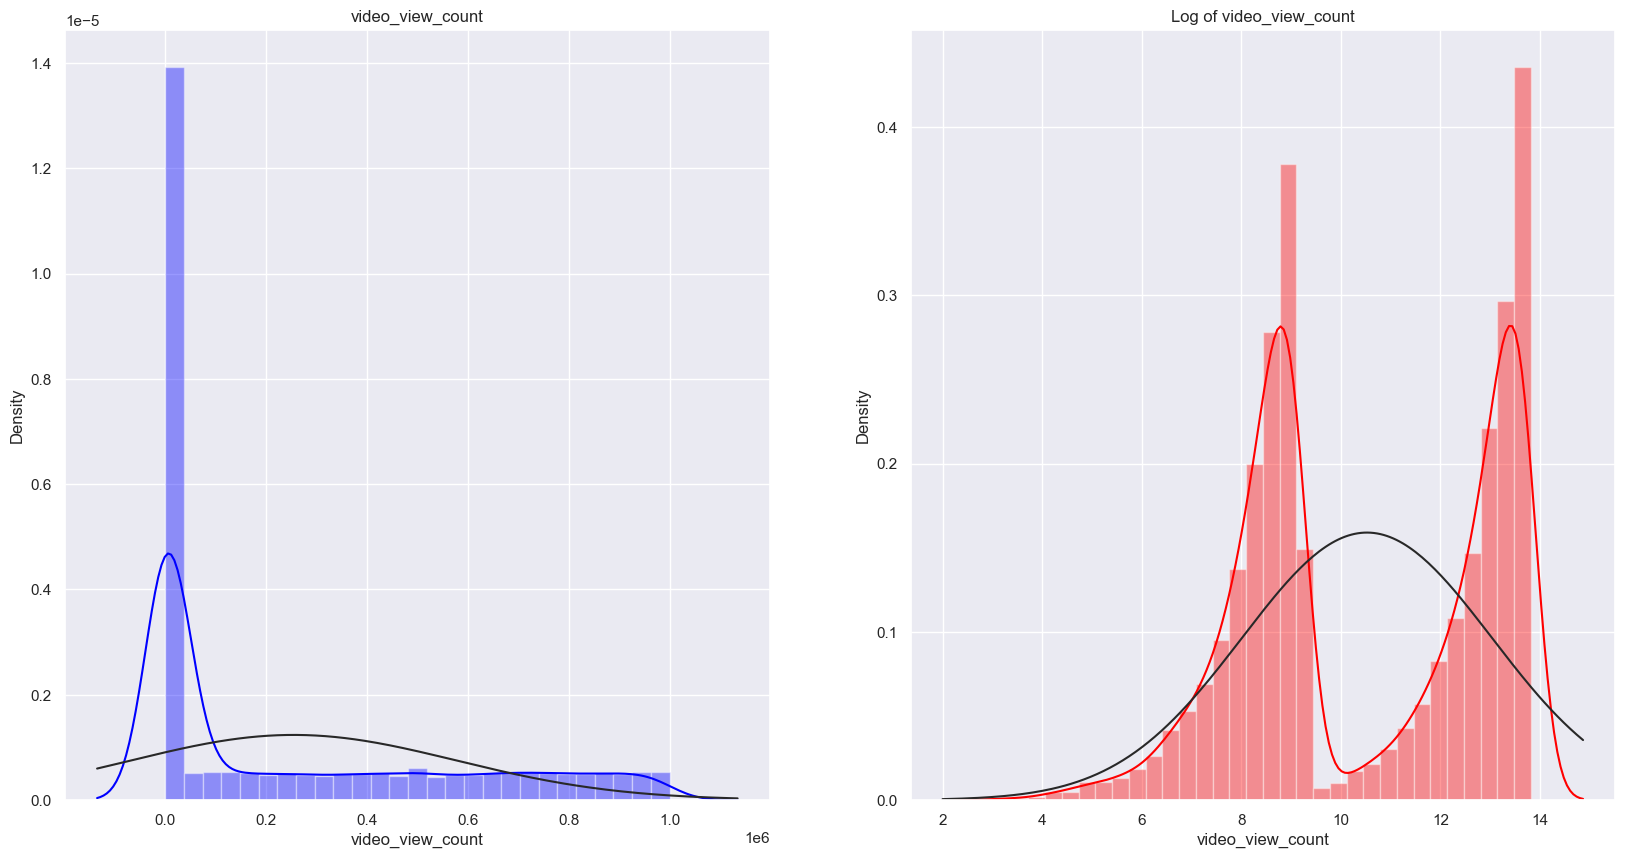

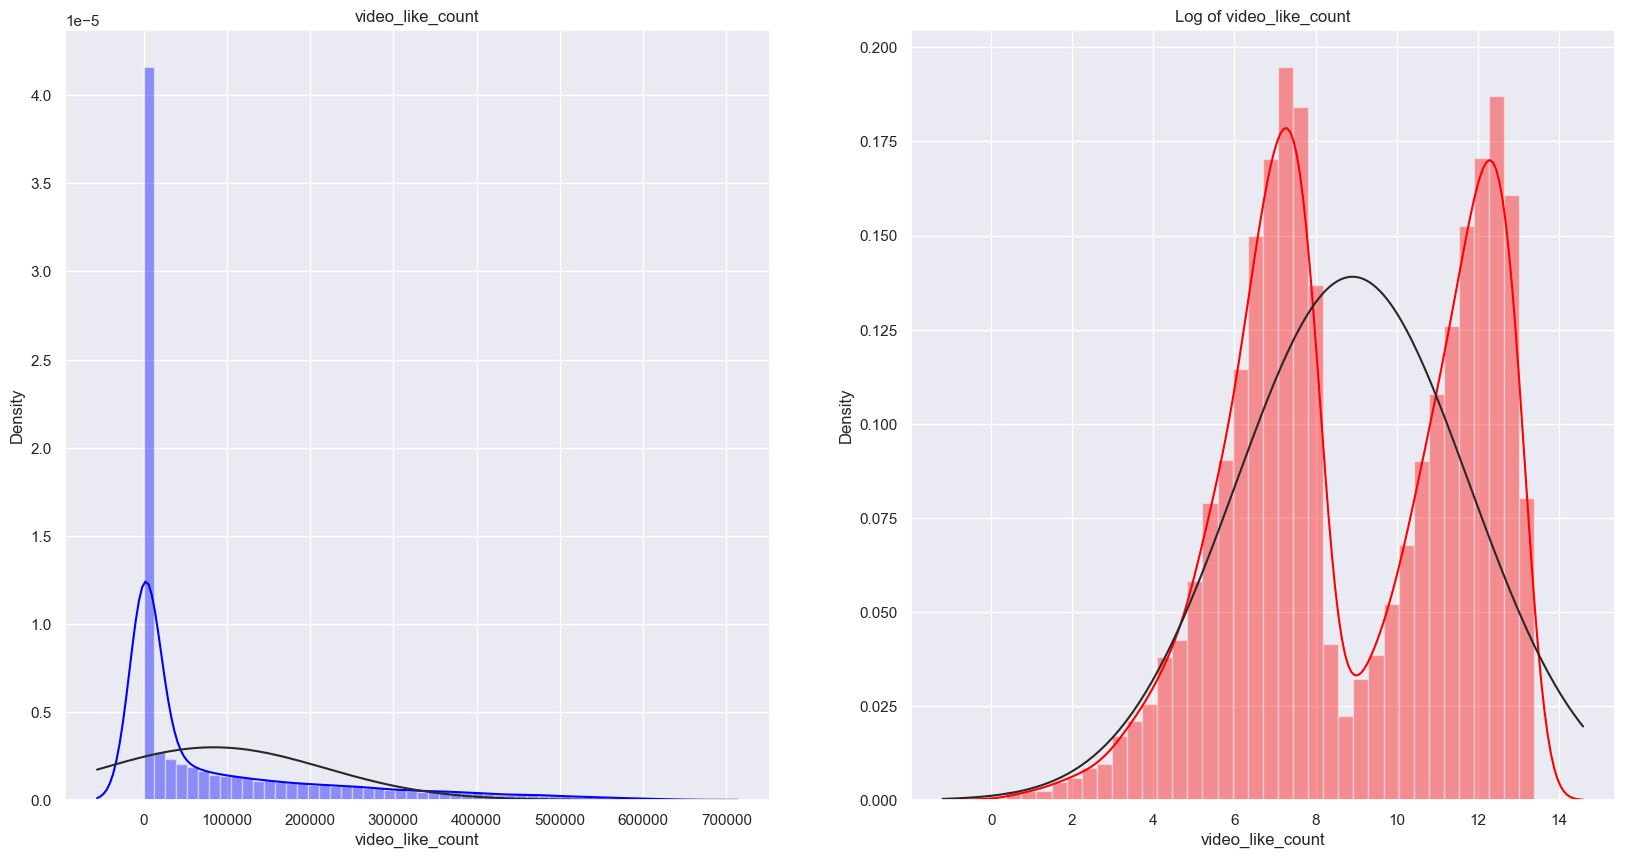

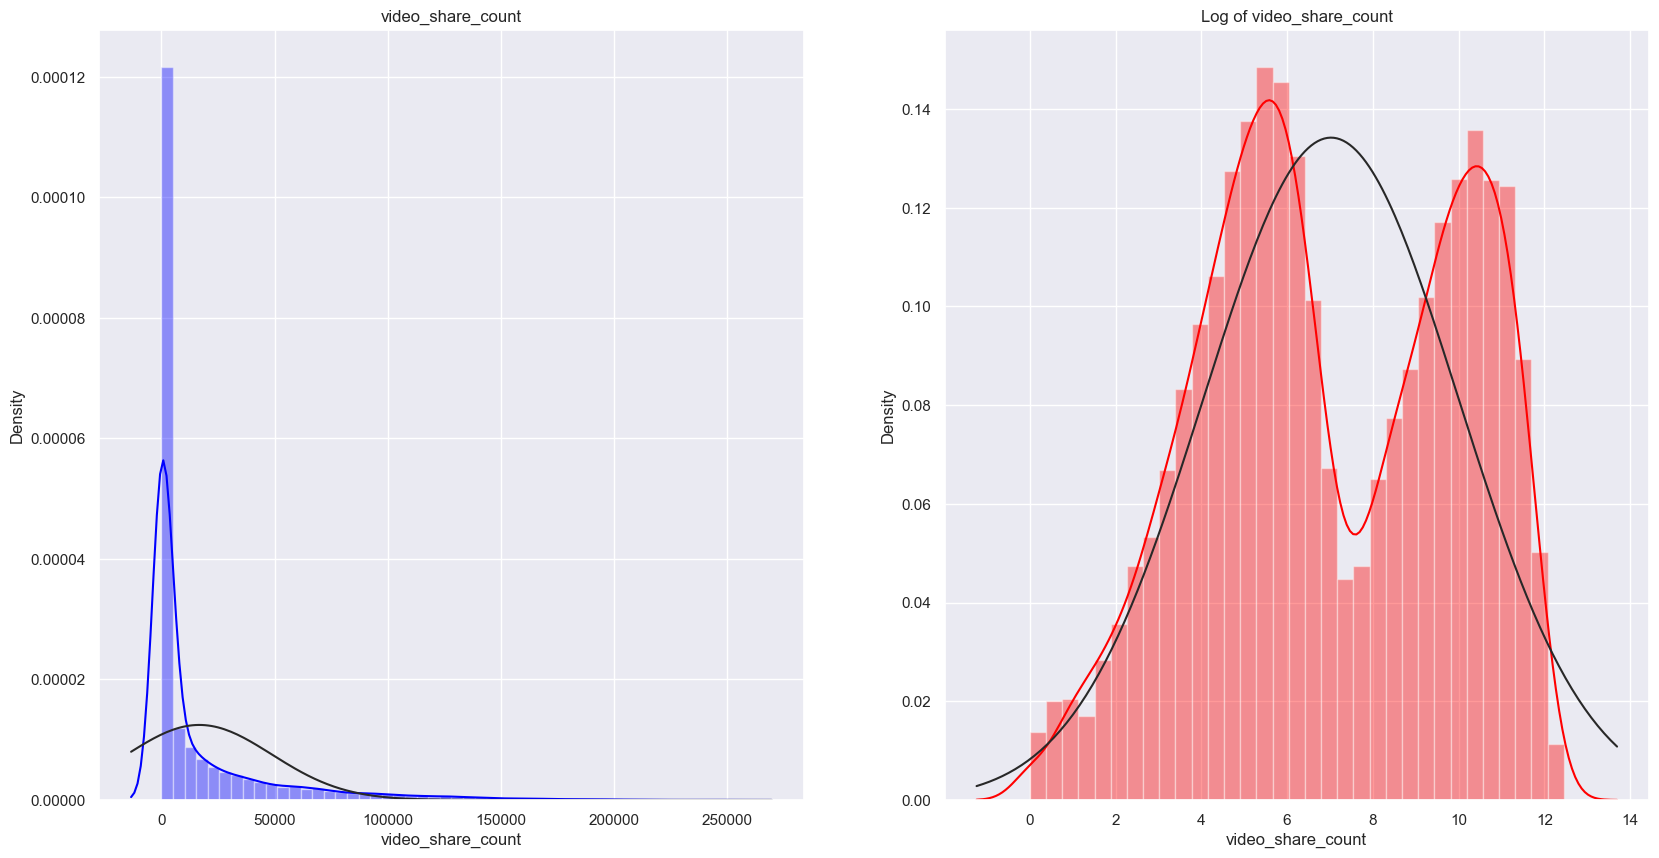

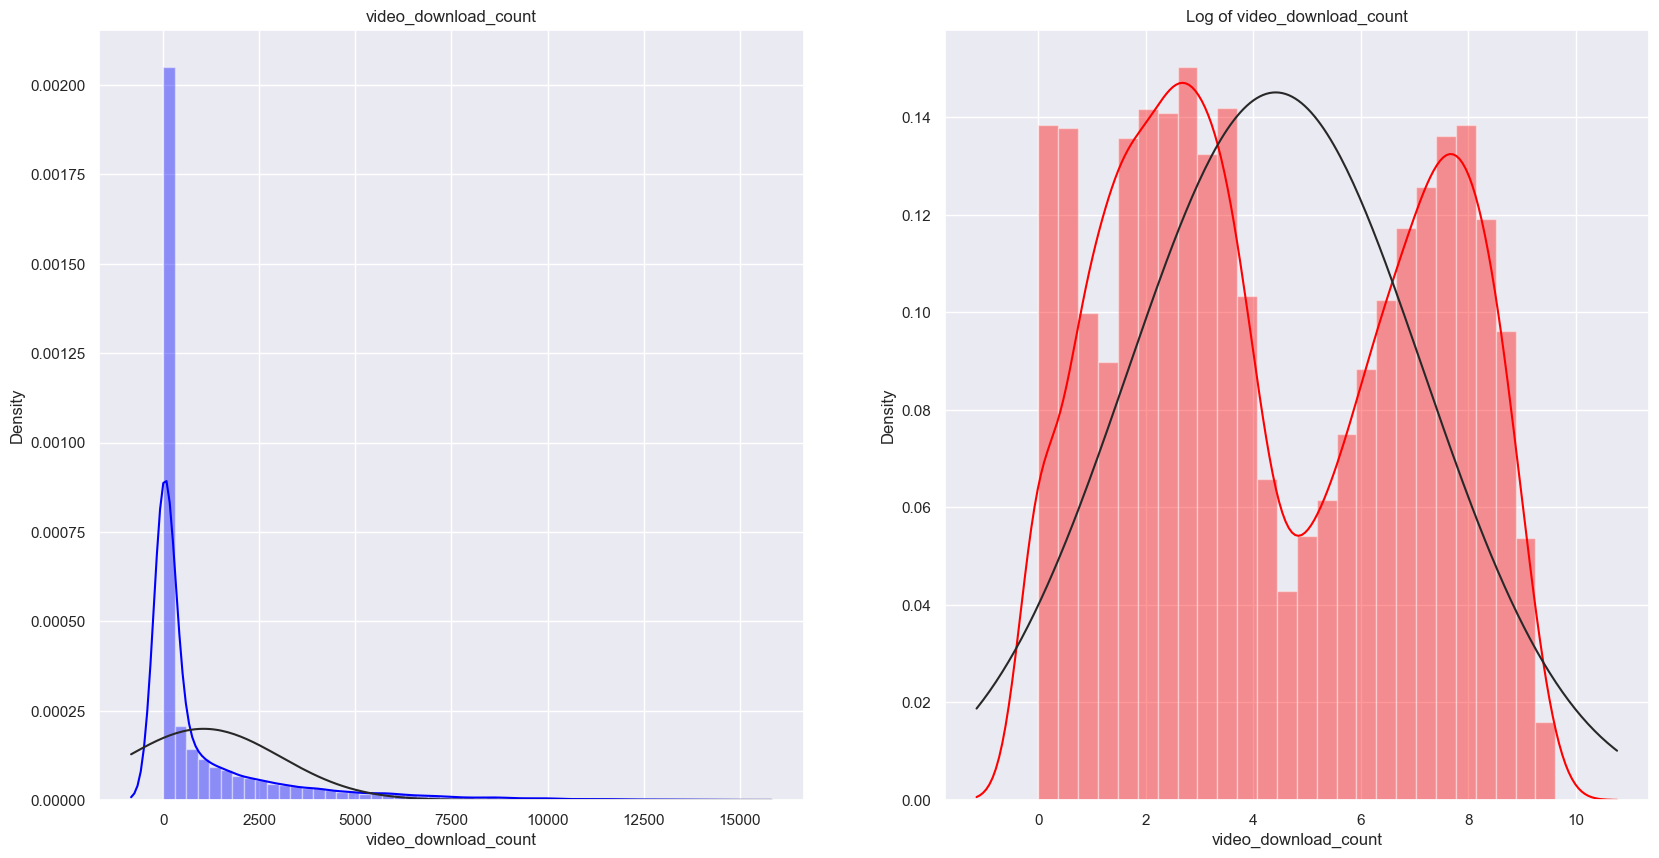

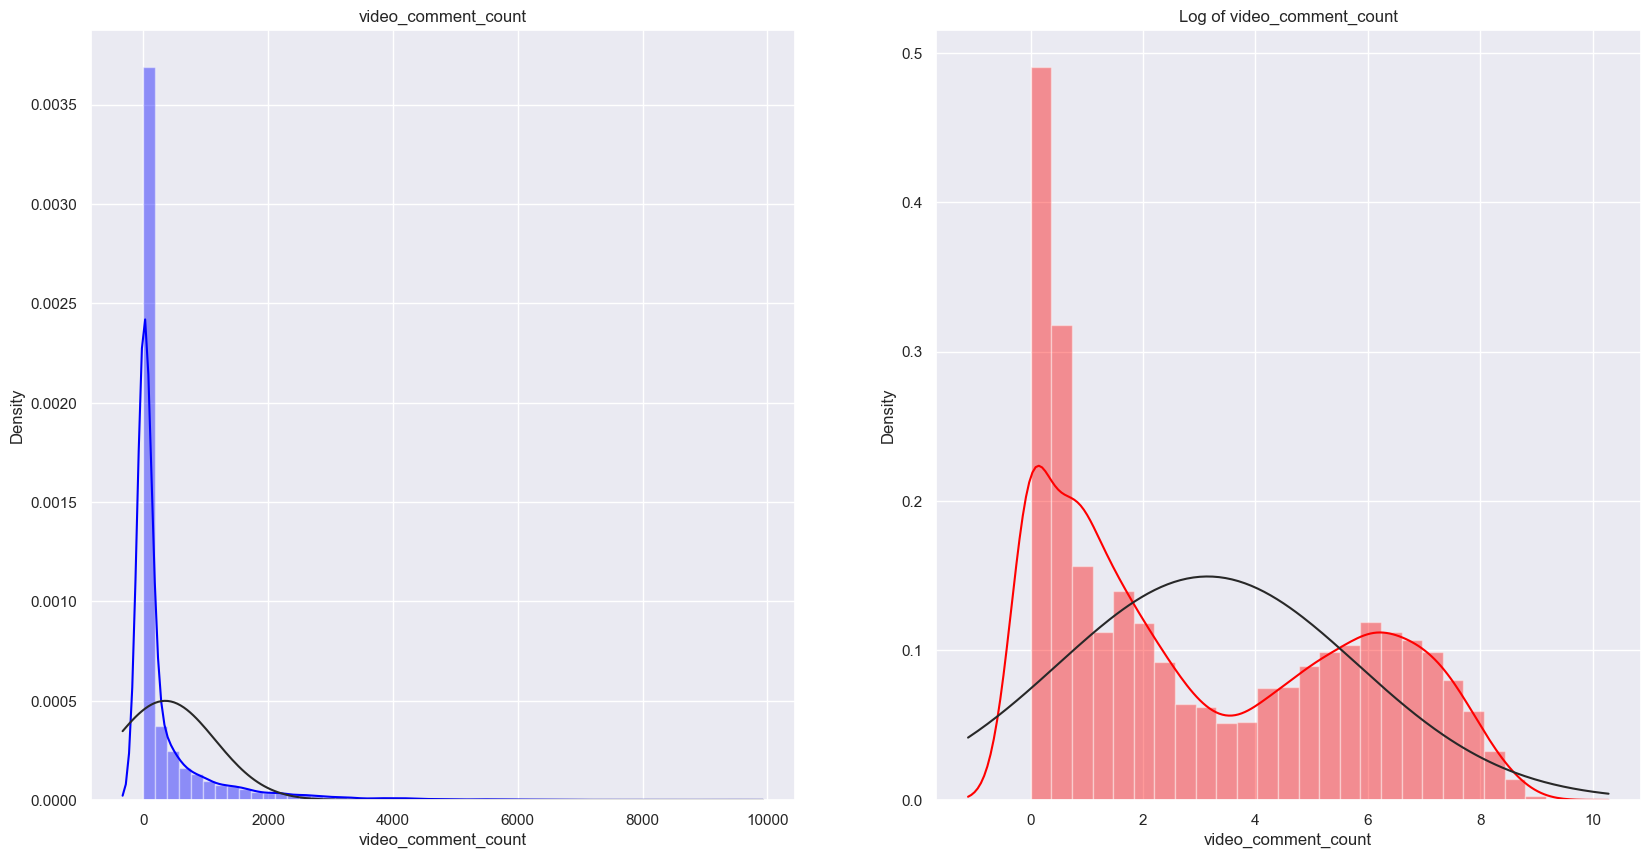

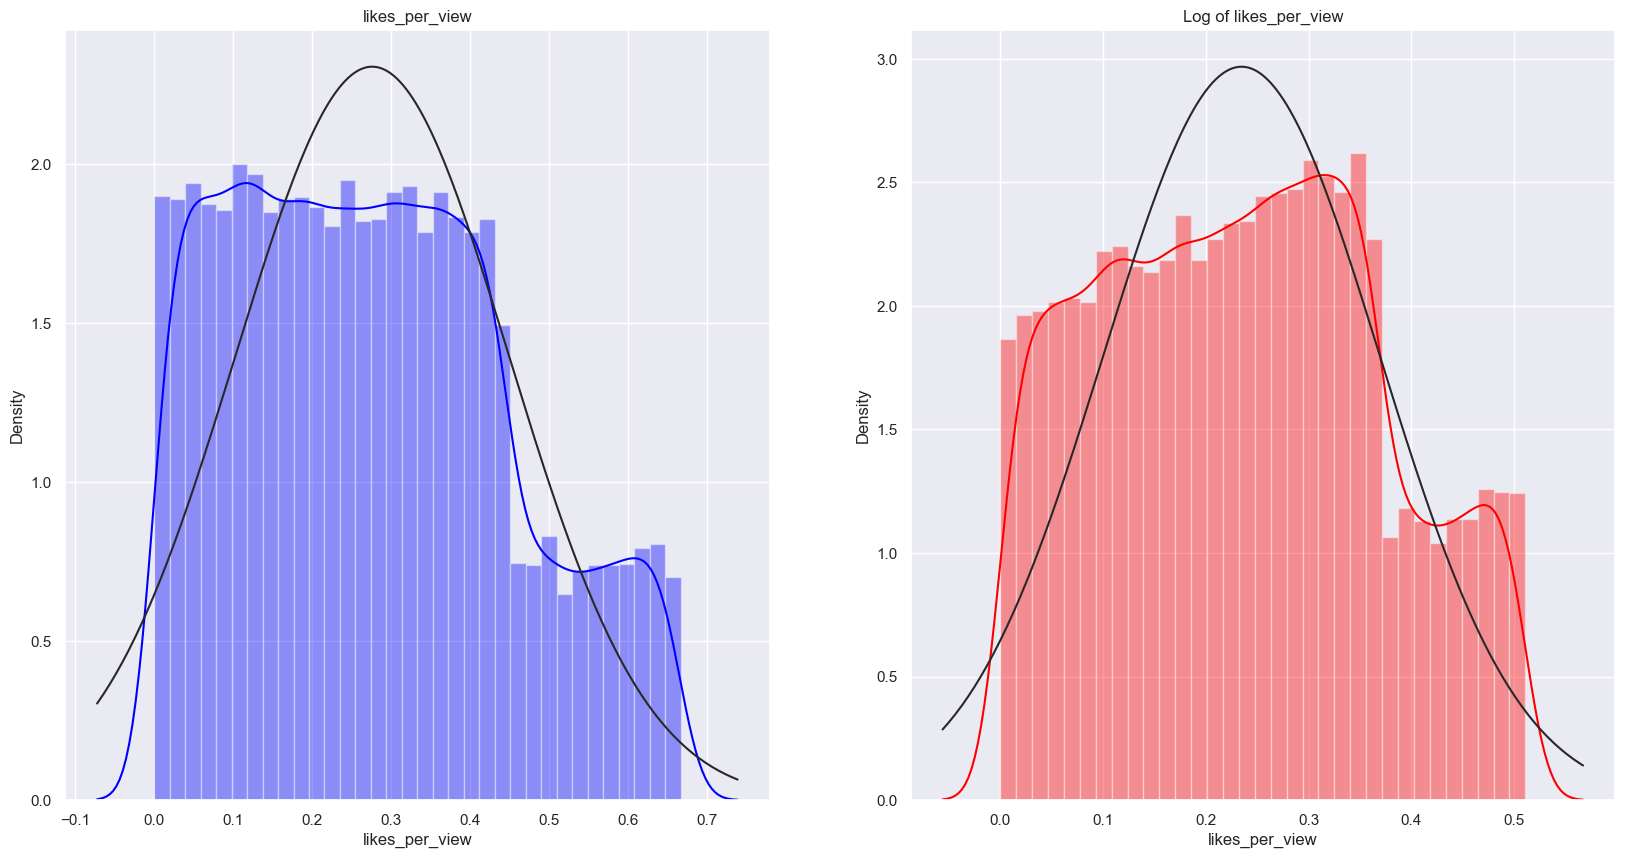

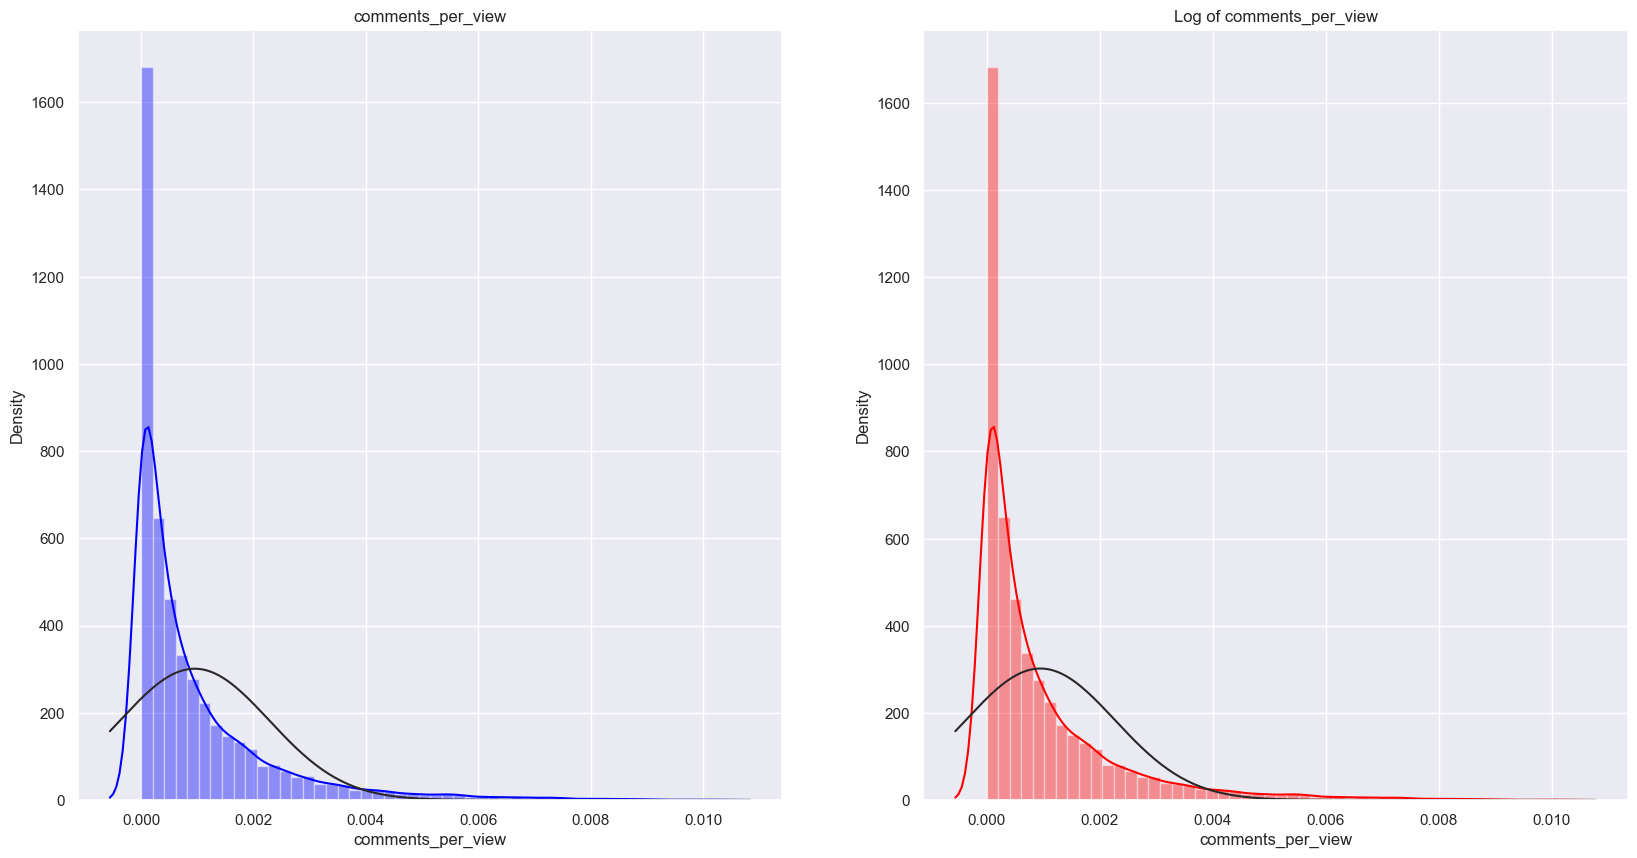

In [30]:
## this is the distibution of i in the continious columns for its lenght. 
## I also log it to compare.
for i in continious:
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(df[i], kde=True, fit=scipy.stats.norm , color='Blue')
    plt.title(i)
    plt.subplot(1, 2, 2)
    sns.distplot(np.log1p(df[i]), kde=True, fit=scipy.stats.norm, color='Red') ## fits is deprecated, still good to demo.
    plt.title('Log of '+i);

## Notes:

[Mann-Whitney U TestMann-Whitney U Test](https://www.youtube.com/watch?v=Twk6lBhBl88https://www.youtube.com/watch?v=Twk6lBhBl88)

[in python](https://www.geeksforgeeks.org/mann-and-whitney-u-test/https://www.geeksforgeeks.org/mann-and-whitney-u-test/)

#### None of the distributions are normal.

If your data is left-skewed and does not become normal even after transformation, you can use **non-parametric** tests for your A/B test. 

**Non-parametric tests are distribution-free tests**, which means that they do not make any assumptions about the distribution of the data. Some common non-parametric tests for A/B testing include:

- The **Mann-Whitney U test**: This test compares the medians of two groups.
- The Wilcoxon signed-rank test: This test compares the medians of two groups when the data is paired.
- The Kruskal-Wallis test: This test compares the medians of three or more groups.

You can choose the appropriate non-parametric test for your A/B test based on the number of groups you are comparing and whether the data is paired.

 - Non-parametric tests are less powerful than parametric tests, meaning that they are less likely to detect a difference between the groups if there is one.
 - Non-parametric tests are more sensitive to outliers than parametric tests.

If you are concerned about the skewness of your data, you can use a non-parametric test for your A/B test. However, it is important to keep in mind the limitations of these tests.



A two-sample t-test steps for conducting a hypothesis test:

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level, 5%
3.   Find the p-value, 
4.   Reject or fail to reject the null hypothesis

**Part 2:** Hypothesis testing with Python

In the population, the sum of the rankings in the two groups differ? 

$H_0$ : Both groups share equally

$H_a$ : Verified users share more than un-verified users.

In [130]:
d1 = df[df['verified_status'] == 'verified']['video_share_count'].astype(int).to_numpy()
d2 = df[df['verified_status'] == 'not verified']['video_share_count'].astype(int).to_numpy()

In [135]:
stat, p_value = mannwhitneyu(d1, d2)
print('Statistics = %.2f, p = %.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics = 7241434.50, p = 0.00
Reject Null Hypothesis (Significant difference between two samples)


#### Conclusion

Since the p-value is close to zero we can reject the null, and say there is a difference in how the groups share.